## Pokemon DB :

Download the "pokedex.sqlite" db from : https://www.dropbox.com/s/dhcz0ryqoxeqqrf/pokedex.sqlite?dl=0

Try to explore and see what is in the DB:

In [1]:
import sqlite3
con = sqlite3.connect("/home/winta/Downloads/pokedex.sqlite")
cur=con.cursor()

In [2]:
# Use this command below to see the list of tables in the DB
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

In [3]:
cur.execute("SELECT type_id, name FROM type_names WHERE local_language_id == 9;")
cur.fetchall()

[(1, 'Normal'),
 (2, 'Fighting'),
 (3, 'Flying'),
 (4, 'Poison'),
 (5, 'Ground'),
 (6, 'Rock'),
 (7, 'Bug'),
 (8, 'Ghost'),
 (9, 'Steel'),
 (10, 'Fire'),
 (11, 'Water'),
 (12, 'Grass'),
 (13, 'Electric'),
 (14, 'Psychic'),
 (15, 'Ice'),
 (16, 'Dragon'),
 (17, 'Dark'),
 (10001, '???'),
 (10002, 'Shadow')]

In [4]:
# Write a query to output the name of the move and name of the type for Generation 1 Pokemon. 
#You wanna look into move_names,moves and type_names tables

#You should see an output like this :


SQL_command="""SELECT move_names.name, type_names.name
FROM move_names 
    JOIN moves 
    ON moves.id = move_names.move_id
    JOIN type_names ON moves.type_id = type_names.type_id
WHERE move_names.local_language_id == 9 
    AND moves.generation_id == 1
    AND type_names.local_language_id == 9
ORDER BY type_names.type_id
;"""

cur.execute(SQL_command)
cur.fetchall()

[('Pound', 'Normal'),
 ('DoubleSlap', 'Normal'),
 ('Comet Punch', 'Normal'),
 ('Mega Punch', 'Normal'),
 ('Pay Day', 'Normal'),
 ('Scratch', 'Normal'),
 ('ViceGrip', 'Normal'),
 ('Guillotine', 'Normal'),
 ('Razor Wind', 'Normal'),
 ('Swords Dance', 'Normal'),
 ('Cut', 'Normal'),
 ('Whirlwind', 'Normal'),
 ('Bind', 'Normal'),
 ('Slam', 'Normal'),
 ('Stomp', 'Normal'),
 ('Mega Kick', 'Normal'),
 ('Headbutt', 'Normal'),
 ('Horn Attack', 'Normal'),
 ('Fury Attack', 'Normal'),
 ('Horn Drill', 'Normal'),
 ('Tackle', 'Normal'),
 ('Body Slam', 'Normal'),
 ('Wrap', 'Normal'),
 ('Take Down', 'Normal'),
 ('Thrash', 'Normal'),
 ('Double-Edge', 'Normal'),
 ('Tail Whip', 'Normal'),
 ('Leer', 'Normal'),
 ('Growl', 'Normal'),
 ('Roar', 'Normal'),
 ('Sing', 'Normal'),
 ('Supersonic', 'Normal'),
 ('SonicBoom', 'Normal'),
 ('Disable', 'Normal'),
 ('Hyper Beam', 'Normal'),
 ('Strength', 'Normal'),
 ('Growth', 'Normal'),
 ('Quick Attack', 'Normal'),
 ('Rage', 'Normal'),
 ('Mimic', 'Normal'),
 ('Screech', '

In [6]:
# Use "for loops" to read each table in the DB and store it as a df with the same name as the table.
#You should see a set of languageslike this :
import pandas as pd

# Read sqlite query results into a pandas DataFrame

df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", con)
print(df+"_df")


                                    name
0         conquest_move_displacements_df
1                   encounter_methods_df
2                        move_targets_df
3                      berry_firmness_df
4                pokemon_move_methods_df
5              conquest_warrior_stats_df
6                          item_flags_df
7                  item_fling_effects_df
8                        item_pockets_df
9                 move_damage_classes_df
10                 evolution_triggers_df
11                    contest_effects_df
12                   pokemon_habitats_df
13                            genders_df
14              super_contest_effects_df
15               conquest_move_ranges_df
16               move_meta_categories_df
17                         egg_groups_df
18                  conquest_episodes_df
19                      contest_types_df
20                         move_flags_df
21        conquest_warrior_archetypes_df
22                     conquest_stats_df
23              

### Types :

In [7]:
# Incomplete
    #Write a query to output the type_id, name for different type of Pokemon and only when the language is English.

    #You should see an output like this :
tnames=['language_names','languages'] 
for table in tnames:    
    str=table+"_df=pd.read_sql_query('SELECT * from {tname}'.format(tname='"+table+"'),con)"    
    exec(str)    
    
combined_df=pd.merge(language_names_df,languages_df,left_on='language_id',right_on='id',how='left')
combined_df

,language_id,local_language_id,name,id,iso639,iso3166,identifier,official,order
0,1,1,日本語,1,ja,jp,ja,1,1.0
1,1,9,Japanese,1,ja,jp,ja,1,1.0
2,2,1,正式ローマジ,2,ja,jp,roomaji,1,2.0
3,2,9,Official roomaji,2,ja,jp,roomaji,1,2.0
4,3,1,韓国語,3,ko,kr,ko,1,NaN
5,3,9,Korean,3,ko,kr,ko,1,NaN
6,4,1,中国語,4,zh,cn,zh,1,NaN
7,4,9,Chinese,4,zh,cn,zh,1,NaN
8,5,1,フランス語,5,fr,fr,fr,1,NaN
9,5,9,French,5,fr,fr,fr,1,NaN


### Gen 1 moves :

In [8]:
SQL_command="""SELECT move_names.name, type_names.name
FROM move_names 
    JOIN moves 
    ON moves.id = move_names.move_id
    JOIN type_names ON moves.type_id = type_names.type_id
WHERE move_names.local_language_id == 9 
    AND moves.generation_id == 1
    AND type_names.local_language_id == 9
ORDER BY type_names.type_id
;"""

cur.execute(SQL_command)
cur.fetchall()

[('Pound', 'Normal'),
 ('DoubleSlap', 'Normal'),
 ('Comet Punch', 'Normal'),
 ('Mega Punch', 'Normal'),
 ('Pay Day', 'Normal'),
 ('Scratch', 'Normal'),
 ('ViceGrip', 'Normal'),
 ('Guillotine', 'Normal'),
 ('Razor Wind', 'Normal'),
 ('Swords Dance', 'Normal'),
 ('Cut', 'Normal'),
 ('Whirlwind', 'Normal'),
 ('Bind', 'Normal'),
 ('Slam', 'Normal'),
 ('Stomp', 'Normal'),
 ('Mega Kick', 'Normal'),
 ('Headbutt', 'Normal'),
 ('Horn Attack', 'Normal'),
 ('Fury Attack', 'Normal'),
 ('Horn Drill', 'Normal'),
 ('Tackle', 'Normal'),
 ('Body Slam', 'Normal'),
 ('Wrap', 'Normal'),
 ('Take Down', 'Normal'),
 ('Thrash', 'Normal'),
 ('Double-Edge', 'Normal'),
 ('Tail Whip', 'Normal'),
 ('Leer', 'Normal'),
 ('Growl', 'Normal'),
 ('Roar', 'Normal'),
 ('Sing', 'Normal'),
 ('Supersonic', 'Normal'),
 ('SonicBoom', 'Normal'),
 ('Disable', 'Normal'),
 ('Hyper Beam', 'Normal'),
 ('Strength', 'Normal'),
 ('Growth', 'Normal'),
 ('Quick Attack', 'Normal'),
 ('Rage', 'Normal'),
 ('Mimic', 'Normal'),
 ('Screech', '

### It is hard to write custome queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

## back to Pandas, some data exploration :

Download another Pokemon dataset from here :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 Lets explore:
Lets explore:

In [9]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
#Let's rename the # column to id, and convert all column labels to lower case.
# use df.rename to rename the # column to id
# use df.columns.str.lower() to convert all column labels to lower case
# you should see:
df.rename(columns={'#': 'id'}, inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_')
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp_ atk,sp_ def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
#Now let's take a look at any duplicated rows via the id column.

# use df.duplicated('id', keep=False) filter
ids = df["id"]
DupID=df[ids.isin(ids[ids.duplicated()])]
DupID.head(10)

,id,name,type 1,type 2,total,hp,attack,defense,sp_ atk,sp_ def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False


In [14]:
# Lets exclude these duplicates in our analysis except for the first instance.

# use df.drop_duplicates
dropdupdf=df.drop_duplicates('id')
# you should see no duplictea anymore if you check :
dropdupdf.head(10)

,id,name,type 1,type 2,total,hp,attack,defense,sp_ atk,sp_ def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [15]:
import numpy as np
df['type 2']

0      Poison
1      Poison
2      Poison
3      Poison
4         NaN
5         NaN
6      Flying
7      Dragon
8      Flying
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
19     Poison
20     Flying
21     Flying
22     Flying
23     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
        ...  
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
781     Grass
782     Grass
783     Grass
784     Grass
785     Grass
786     Grass
787     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: type 2, Length: 800, dtype: object

In [16]:
#Fill the Nan values
df['type 2'] = df['type 2'].fillna('missing')

df.head(20)

,id,name,type 1,type 2,total,hp,attack,defense,sp_ atk,sp_ def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,missing,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,missing,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,missing,314,44,48,65,50,64,43,1,False


In [19]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
pokedexdf=df[["id", "name", "type 1", "type 2", "generation", "legendary"]] 
pokedexdf.head(10)
    

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,missing,1,False
5,5,Charmeleon,Fire,missing,1,False
6,6,Charizard,Fire,Flying,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,1,False
9,7,Squirtle,Water,missing,1,False


In [20]:
#poke_statisticsdf=df[["id", "hp", "attack", "defense", "sp_ atk","sp_ def", "speed","total"]] 
poke_statisticsnoDup=df[["id", "hp", "attack", "defense", "sp_ atk","sp_ def", "speed","total"]] 
#poke_statisticsdf.head(10)
poke_statisticsnoDup.head(10)



,id,hp,attack,defense,sp_ atk,sp_ def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
3,3,80,100,123,122,120,80,625
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405
6,6,78,84,78,109,85,100,534
7,6,78,130,111,130,85,100,634
8,6,78,104,78,159,115,100,634
9,7,44,48,65,50,64,43,314


In [21]:
#after removing duplicate value
poke_statisticsnoDup.describe()

,id,hp,attack,defense,sp_ atk,sp_ def,speed,total
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,435.10250
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,119.96304
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,330.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,450.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,780.00000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [22]:
# create a groupby to see below :

poke=pokedexdf[["id", "generation"]] 
g1 = poke.groupby( "generation").describe()
g1

id                                                            
            count        mean        std    min     25%    50%     75%    max
generation                                                                   
1           166.0   75.819277  45.153246    1.0   36.25   76.5  115.00  151.0
2           106.0  202.283019  28.769612  152.0  178.25  203.5  226.75  251.0
3           160.0  321.968750  40.581221  252.0  287.75  321.5  358.25  386.0
4           121.0  442.446281  31.250053  387.0  415.00  444.0  471.00  493.0
5           165.0  574.272727  46.516108  494.0  534.00  574.0  615.00  649.0
6            82.0  688.012195  21.291912  650.0  670.25  688.5  708.75  721.0

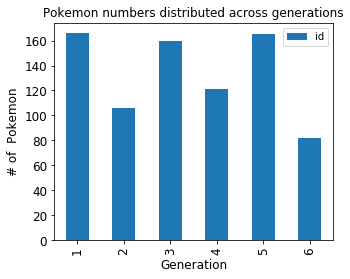

In [23]:
%matplotlib inline
# create plot below :

import matplotlib.pyplot as plt
countpoke=poke.groupby( "generation").count()
ax = countpoke.plot(kind='bar', title ="Pokemon numbers distributed across generations", figsize=(5, 4), legend=True, fontsize=12)
ax.set_xlabel("Generation", fontsize=12)
ax.set_ylabel("# of  Pokemon", fontsize=12)
plt.show()

### Try Seaboarn:

/home/winta/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


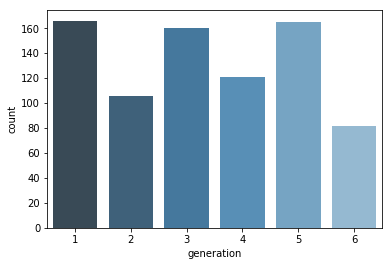

In [24]:
import seaborn as sb
sb.countplot(x="generation", data= poke, palette="Blues_d");

/home/winta/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


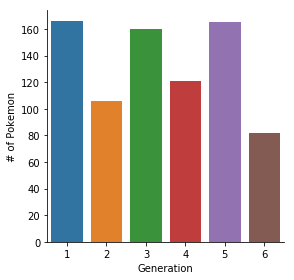

In [25]:
sb.factorplot(kind='count', data=poke, x='generation').set_axis_labels("Generation", "# of Pokemon")

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

/home/winta/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


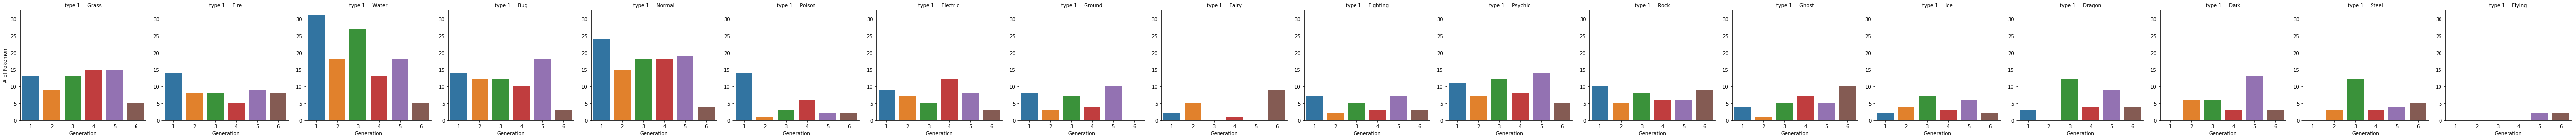

In [27]:
sb.factorplot(kind='count', 
              data=pokedexdf, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

/home/winta/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


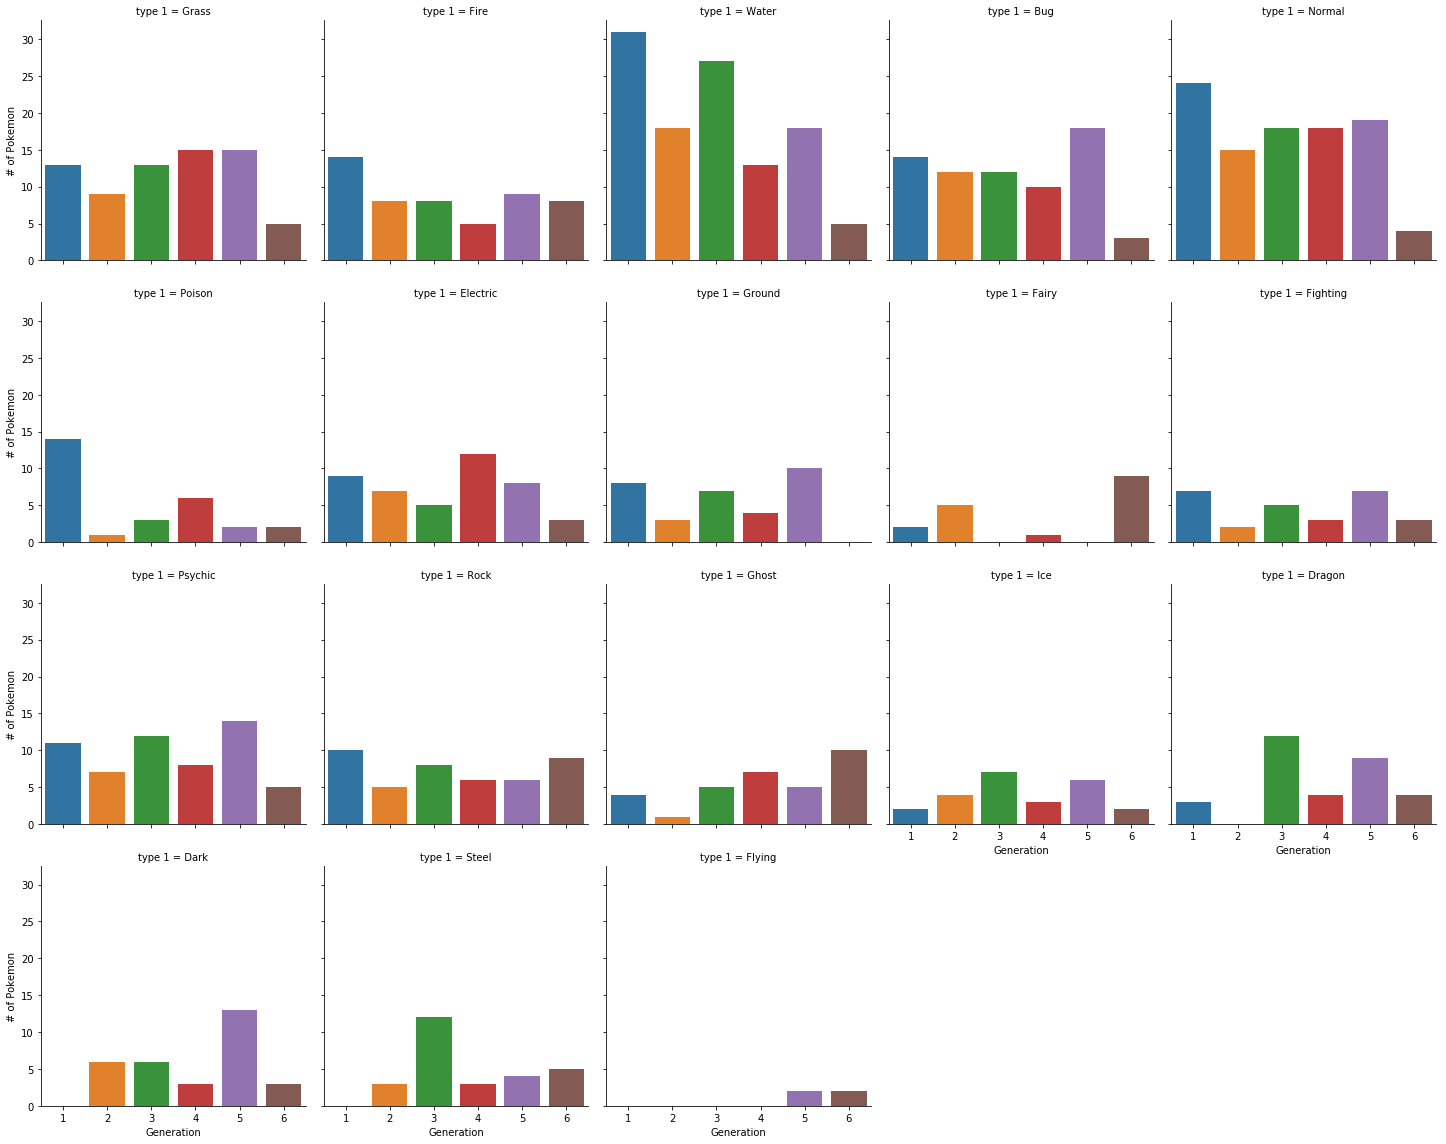

In [28]:
# Add col_wrap option to the above to get below (look into sb.factorplot documentation)
sb.factorplot(kind='count', 
              data=pokedexdf, 
              col ='type 1',
              col_wrap=5,
              x='generation').set_axis_labels("Generation", "# of Pokemon")

In [30]:
#Summarize your observations/conclusions here :



### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [31]:
import numpy as np
np.setdiff1d  #Return the sorted, unique values in `ar1` that are not in `ar2`.

<function numpy.lib.arraysetops.setdiff1d>

In [32]:
unique_type1 =  np.setdiff1d(pokedexdf['type 1'],['type 2'])

unique_type1

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

In [33]:
unique_type2 =  np.setdiff1d(pokedexdf['type 2'].fillna('missing'),['type 1'])  
unique_type2

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'missing'], dtype=object)

In [29]:
### There are no unique primary or secondary types

In [34]:
# Get The total number of primary and secondary types:
type1, type2 = pokedexdf.groupby('type 1'), pokedexdf.groupby('type 2')

print ('# of Type1 Pokemon: {}'.format(len(type1)))
print ('# of Type2 Pokemon: {}'.format(len(type2)))

# of Type1 Pokemon: 18
# of Type2 Pokemon: 19


### What are the most common types of Pokemon?

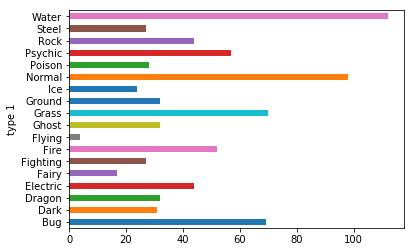

In [35]:
# Make a plot of the distribution of the Type 1 Pokemon. 
import matplotlib.pyplot as plt
type1['id'].count().plot(kind='barh' )



/home/winta/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


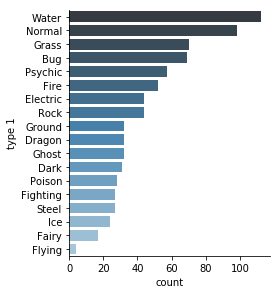

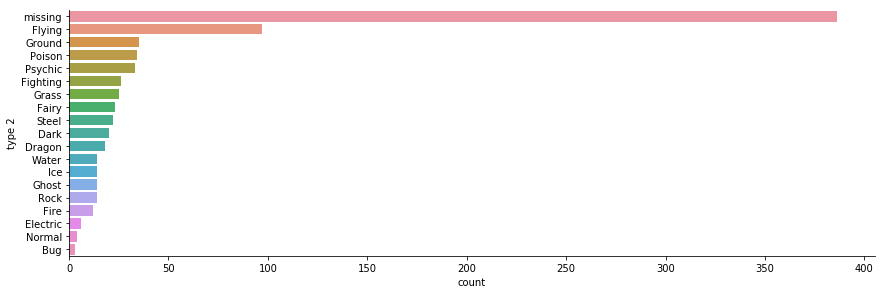

In [51]:
# Now try Seaborn:
sb.factorplot(data=pokedexdf,
               y='type 1',
                kind='count',
                 order = pokedexdf['type 1'].value_counts().index,
                 aspect=1,palette="Blues_d")

sb.factorplot(data=pokedexdf,
               y='type 2',
                kind='count',
                order = pokedexdf['type 2'].value_counts().index,
                aspect=3.1)

In [74]:
#Summarize your observations/conclusions here :


### But we can not say which type maps into which type !

Lets create a heatmap !

In [47]:
# Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2
# You should see this :
dual_types=pokedexdf[pokedexdf['type 2'] != 'None']
dual_types

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,missing,1,False
5,5,Charmeleon,Fire,missing,1,False
6,6,Charizard,Fire,Flying,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,1,False
9,7,Squirtle,Water,missing,1,False


In [54]:
# Get a grid of values from 'type 1' 'type 2'  (Hint: use groupby, size, unstack, values 
#and any other attributes you may need !)
dual_types.groupby(['type 1', 'type 2']).size().unstack().values.shape


(18, 19)

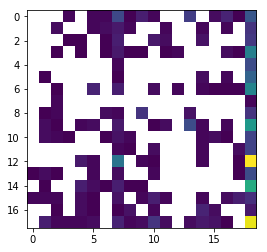

In [53]:
# Try matplotlib imshow as a way to get a heatmap, something like this:
plt.imshow(dual_types.groupby(['type 1', 'type 2']).size().unstack().values)

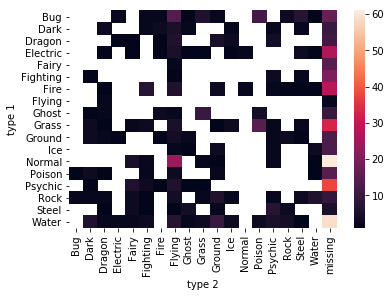

In [56]:
# Obviousely, the plot is not very nice !
# Use seaborn heatmap option to get something like this :
sb.heatmap(dual_types.groupby(['type 1', 'type 2']).size().unstack())

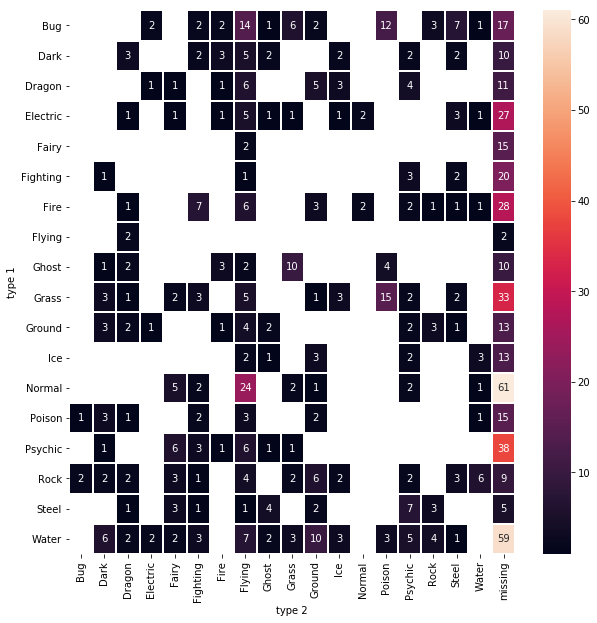

In [57]:
# Refine your seaborn expression to get a better heatmap :
plt.figure(figsize=(10, 10))
sb.heatmap(dual_types.groupby(['type 1', 'type 2']).size().unstack(),
              linewidths=1,
              annot=True)

In [280]:
#Summarize your observations/conclusions here :
# This plot reveals that five most common combinations of primary and secondary type are in order:

#     Normal/Flying-type
#     Bug/Flying-type
#     Bug/Poison-type
#     Grass/Poison-type
#     Water/Ground-type


### Are any of the statistics correlated?

In [59]:
# It seems hard to see the correlation based on the scatter plots.

# Instead, use "pearsonr" function from scipy's "stats" library to compute the correlation between 
from scipy import stats
stats.pearsonr

<function scipy.stats.stats.pearsonr>

In [62]:
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients
stats.pearsonr(poke_statisticsnoDup.hp, poke_statisticsnoDup.defense)

(0.23962231884672575, 6.545752048690591e-12)

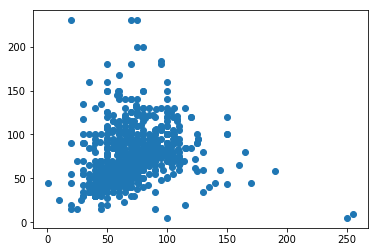

In [64]:
plt.scatter(poke_statisticsnoDup.hp, poke_statisticsnoDup.defense)

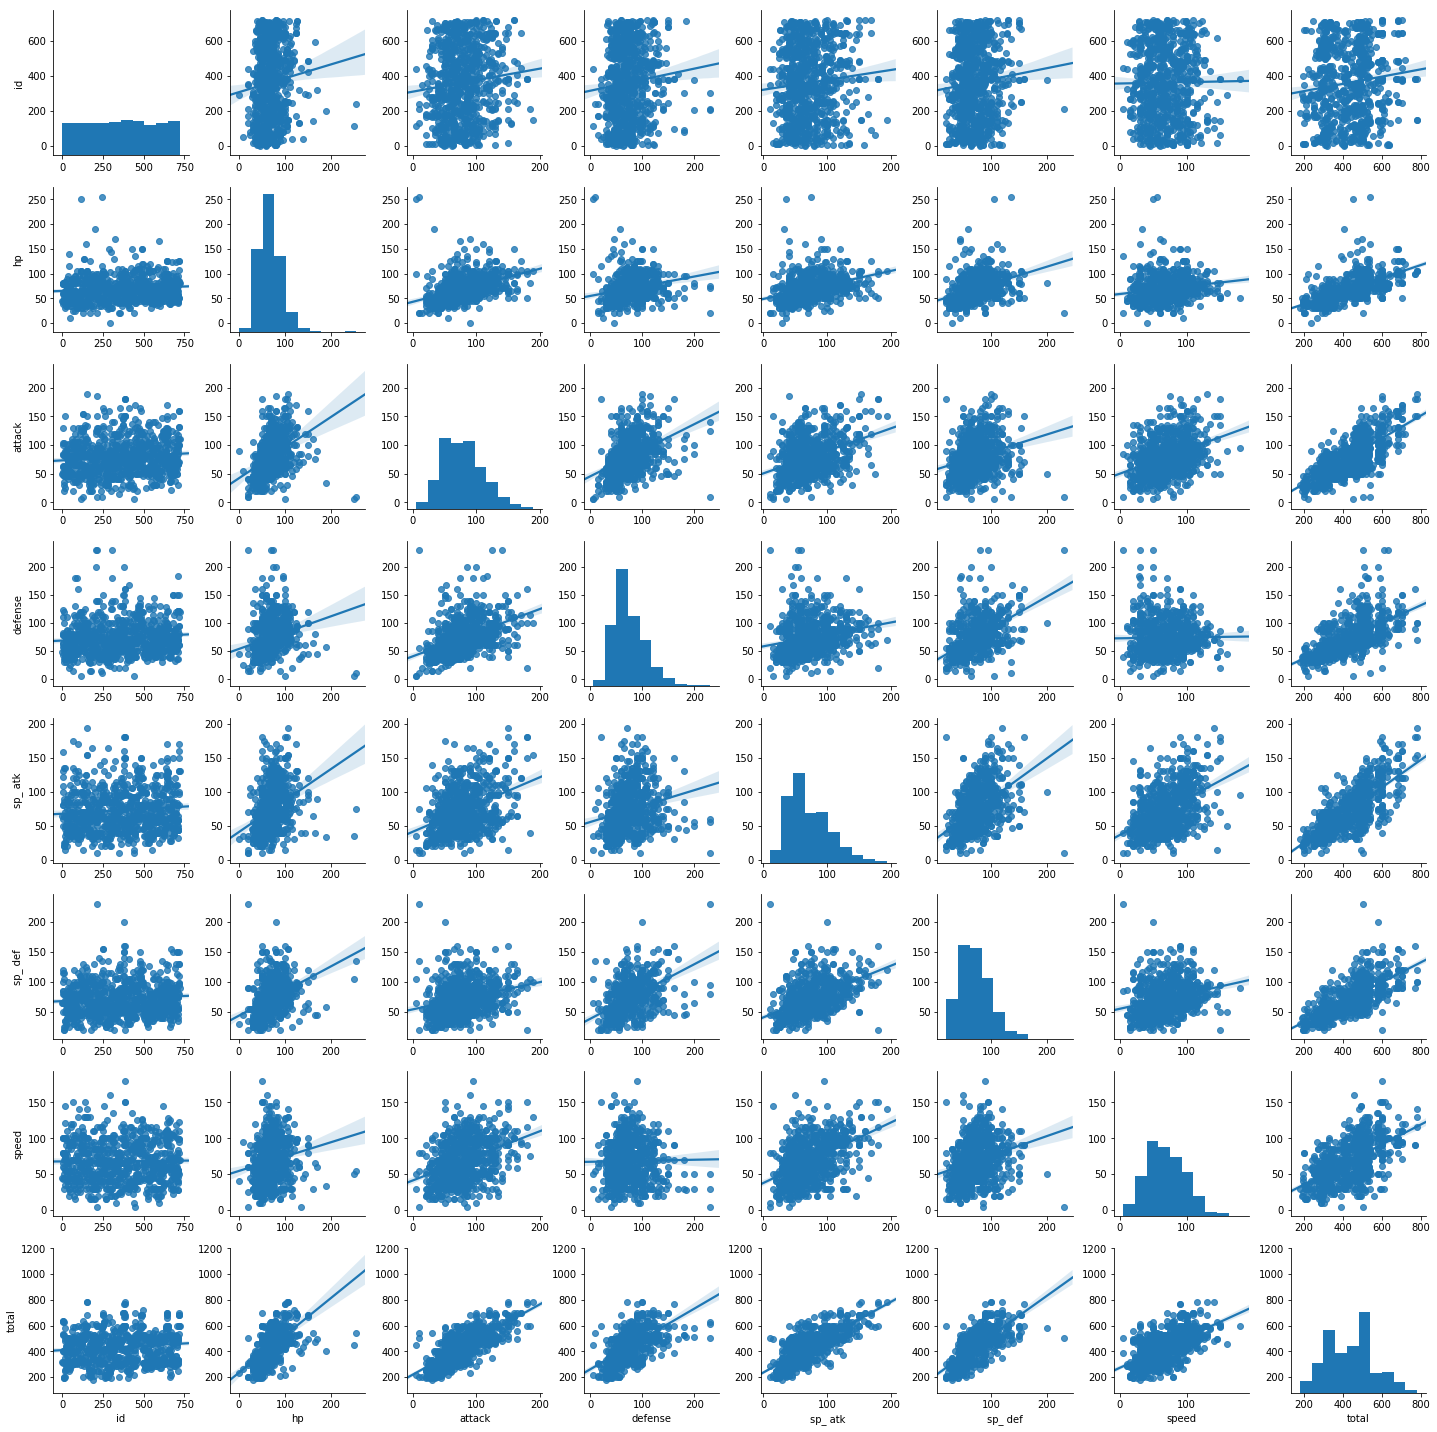

In [63]:
# Nothing is better than a good visualization. 
# Try seaborn's pairplot to get something like this :
sb.pairplot(
    data=poke_statisticsnoDup,
    kind='reg'
)

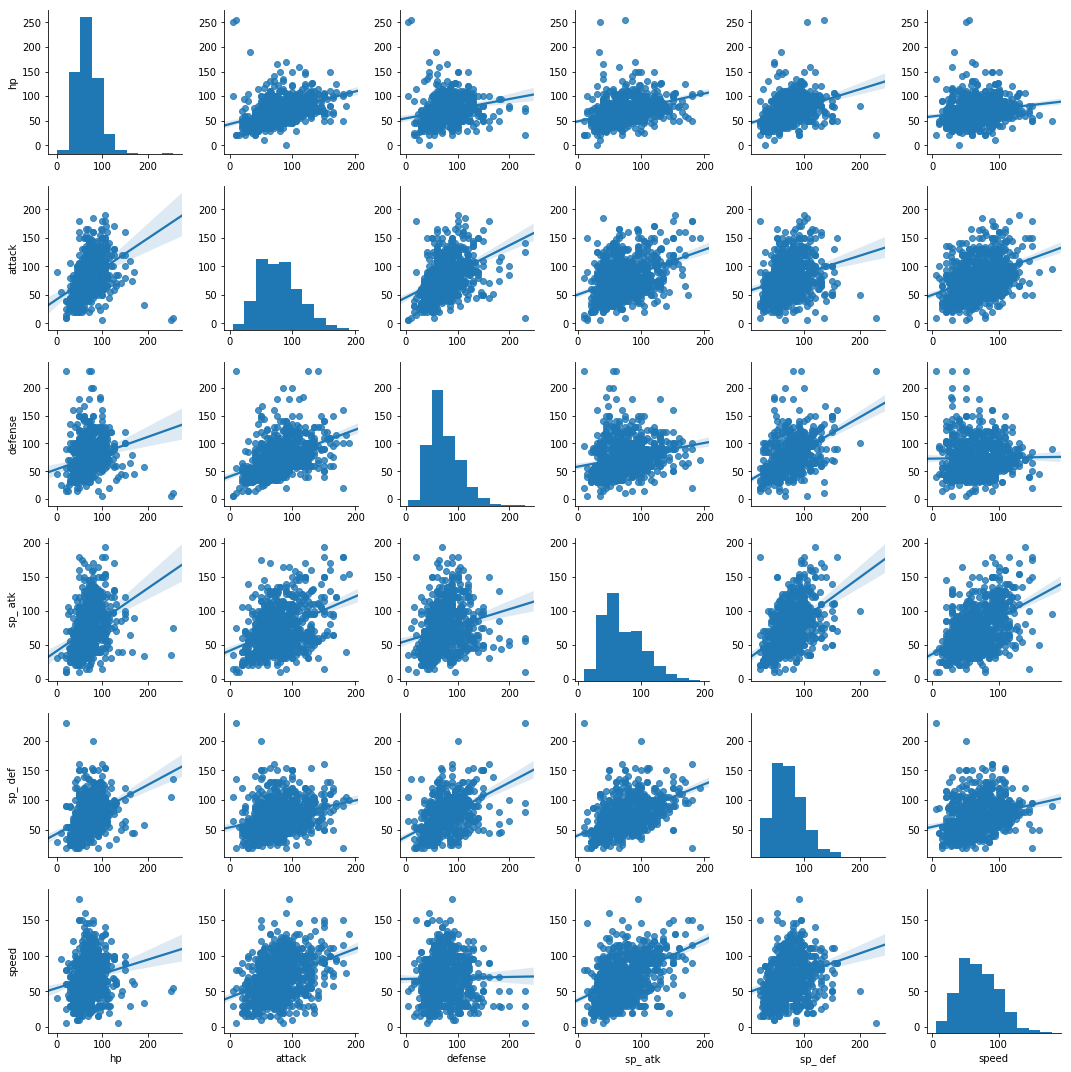

In [66]:
# Get rid of extra columns :
sb.pairplot(
    data=poke_statisticsnoDup.loc[:, 'hp':'speed'] ,
    kind='reg'
)

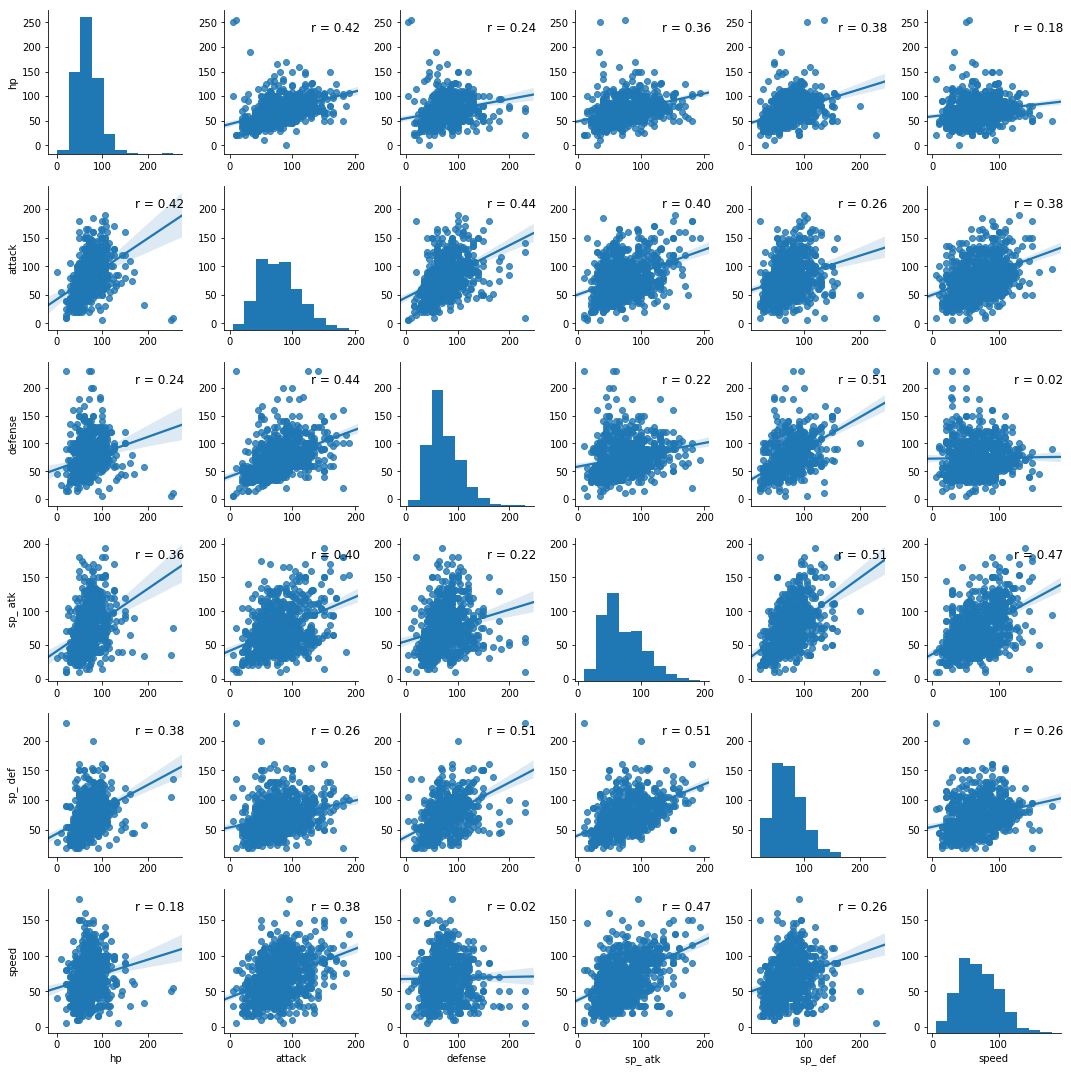

In [68]:
# See if you can refine your code to get this :
def show_corr(x, y, **kwargs):
    (r, _) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        'r = {:.2f}'.format(r),
         xy=(0.65, 0.85),
         xycoords=ax.transAxes,
         fontsize=12
    )

sbplot=sb.pairplot(
    data=poke_statisticsnoDup.loc[:, 'hp':'speed'],
    kind='reg'
)
sbplot.map_offdiag(show_corr);

In [1]:
#Summarize your observations/conclusions here :
# This plot shows that the five most correlated pairs of statistics are in order:

#     special attack/special defense
#     defense/special defense
#     attack/defense
#     attack/HP
#     special attack/speed

# We can see that none of the statistics are strongly correlated, 
#which is actually important as that would favor certain Pokemon or types of Pokemon over others. 
#However, it is worth noting that all of the statistics are positively correlated except for defense 
#and speed—this particular case is epitomized by Rock-type and Steel-type Pokemon!

### What are the strongest and weakest Pokemon species?

In [2]:
# Do your calculations here :

In [3]:
# Explain why useing "Total" is not the best meric ?

In [4]:
# Instead, try a different metric: standardize the six statistic columns independently by converting each 
# value into a z-score so when we do take the sum, we account for the variation in the each statistic using 
# its mean and standard deviation across all Pokemon species. 

In [5]:
# Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, 
# the stronger the Pokemon.

In [6]:
# Repeat the heatmap ypu created but now for the  bew strength metric you computed

### Do any types of Pokemon excel at certain statistics over others?

In [7]:
# Do your calculations here. Create a heat map to show this at the end.

### Are any of the statistics correlated?

In [8]:
# Do your calculations here. Create a set of correlation plots as you did before to show this at the end.

In [ ]:
# Summarize your observation here :